# Lab 01 -  Bazowa implementacja

## Agenda

- punktowanie
- obecność na zajęciach
- format przygotowania zadań
- zadania wysyłamy na: malkinskim@student.mini.pw.edu.pl

---

- harmonogram zajęć i terminów: http://pages.mini.pw.edu.pl/~karwowskij/mioad/harmonogram.html
- opis zadania: http://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html
- zbiory danych: https://pages.mini.pw.edu.pl/~karwowskij/mioad/mio1.tar.xz

## [Zadanie](http://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html#org6058800)
Na tych zajęciach należy zaimplementować sieć neuronową typu MLP, w której można ustawić:
- liczbę warstw,
- liczbę neuronów w każdej z warstw,
- wagi poszczególnych połączeń, w tym biasów.

Sieć ma używać sigmoidalnej funkcji aktywacji. Na wyjściu dopuszczana jest funkcja liniowa.

Implementacja sieci musi być przygotowana w taki sposób, żeby łatwo zmieniać:
- architekturę, to znaczy liczbę wejść, wyjść, neuronów w warstwach ukrytych,
- funkcję aktywacji.

Tak przygotowaną implementację należy następnie wykorzystać do rozwiązania zadania regresji na dostarczonych danych. Parametry sieci należy dobrać ręcznie, tak aby uzyskać możliwie dobrze wyniki na zbiorach danych (zbudować po jednej sieci dla każdego zbioru):
- square-simple
- steps-large

Rozważyć architektury sieci:
- jedna warstwa ukryta, 5 neuronów,
- jedna warstwa ukryta, 10 neuronów,
- dwie warstwy ukryte, po 5 neuronów każda.

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics


# Square-simple

In [245]:
train_df = pd.read_csv('../data/square-simple-training.csv', index_col=0)
test_df = pd.read_csv('../data/square-simple-test.csv', index_col=0)
train_df

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852
...,...,...
96,0.529373,-104.778766
97,1.374914,40.134900
98,-1.101985,-20.706642
99,1.175777,-5.579327


In [246]:
train_df['split'] = 'train'
test_df['split'] = 'test'
df = pd.concat([train_df, test_df])

Text(0.5, 1.0, 'Train split')

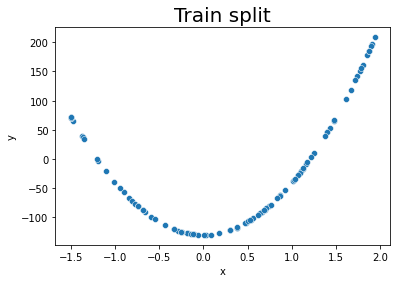

In [247]:
sns.scatterplot(x='x', y='y', data=train_df)
plt.title('Train split', fontsize=20)

Text(0.5, 1.0, 'Test split')

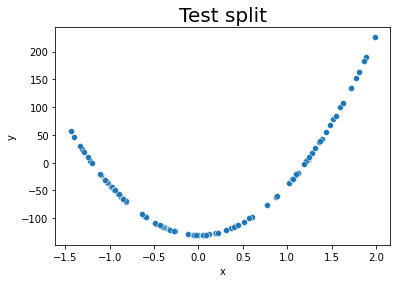

In [248]:
sns.scatterplot(x='x', y='y', data=test_df)
plt.title('Test split', fontsize=20)

<AxesSubplot:xlabel='x', ylabel='y'>

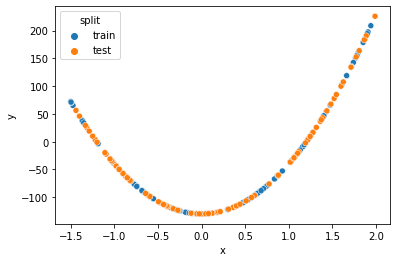

In [249]:
sns.scatterplot(x='x', y='y', hue='split', data=df)

In [250]:
def activation_function(x):
    return (1 / (1 + np.exp(-x)))


class MLP:
    def __init__(self, neurons_in_layer, weights, input_size, output_size=1,
                 activation_function=activation_function):
        """
        Class will take weights as array and will internally transfer it to list of arrays.
        """
        self.layers = len(neurons_in_layer)
        neurons_in_layer.insert(0, input_size)
        neurons_in_layer.append(output_size)
        self.neurons_in_layer = neurons_in_layer
        self.input_size = input_size
        total_weights = 0
        nodes = []
        weights_nn = []
        total_weights = 0

        for i in range(len(neurons_in_layer) - 1):
            weights_to_add = (neurons_in_layer[i]+1) * neurons_in_layer[i + 1]
            weights_nn.append(np.array(
                weights[total_weights:(total_weights + weights_to_add)]).reshape(neurons_in_layer[i] + 1,
                                                                                 neurons_in_layer[i+1]))
            total_weights += weights_to_add
        self.weights = weights_nn
        
    def forward(self, X):

        current_layer = activation_function(np.c_[np.ones(X.shape[0]), X] @ self.weights[0])
        for i in range(1, self.layers):
            
            current_layer = activation_function(
                    np.c_[np.ones(current_layer.shape[0]), current_layer] @ self.weights[i])

        current_layer = np.c_[np.ones(current_layer.shape[0]), current_layer] @ self.weights[self.layers]

        return current_layer



Użyję architektury z jedną warstwą oraz 10 neuronami, jendakże dla ułatwienia będą one "wyłączone"

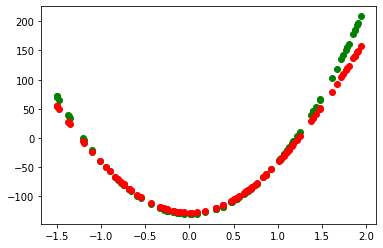

In [285]:
mlp = MLP(
            input_size=1,
            neurons_in_layer=[10],
            weights=np.concatenate( (
            np.array([2, 1, 0, -1, -2, 0,0,0,0,0]),
            np.array([-1, -1, -1, -1, -1, 0,0,0,0,0]),
            np.array([650, -900, -200, 0, 200, 900, 0,0,0,0,0])))
)

train_df = df.query('split == "train"')
x = train_df['x'].values
x = np.expand_dims(x, 1)
y_pred = mlp.forward(x)
y_pred = np.squeeze(y_pred)
y_pred.shape

plt.scatter(train_df['x'], train_df['y'], color='green')
plt.scatter(train_df['x'], y_pred, color='red')

In [286]:
metrics.mean_absolute_error(train_df['y'], y_pred)


8.366181727622488

# Steps-large


In [287]:
train_df = pd.read_csv('../data/steps-large-training.csv', index_col=0)
test_df = pd.read_csv('../data/steps-large-test.csv', index_col=0)
train_df

,x,y
1,-1.481354,-80
2,1.033264,80
3,-0.076403,0
4,-1.419785,-80
5,-0.108398,0
...,...,...
9996,1.281784,80
9997,0.460459,0
9998,0.810917,80
9999,0.644318,80


In [288]:
train_df['split'] = 'train'
test_df['split'] = 'test'
df = pd.concat([train_df, test_df])

Text(0.5, 1.0, 'Train split')

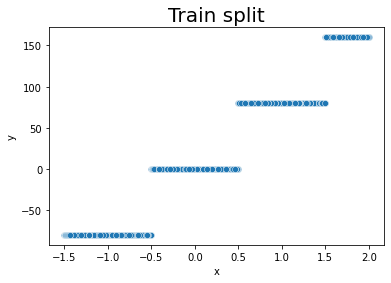

In [289]:
sns.scatterplot(x='x', y='y', data=train_df)
plt.title('Train split', fontsize=20)

Text(0.5, 1.0, 'Test split')

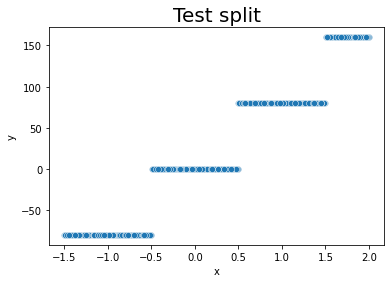

In [290]:
sns.scatterplot(x='x', y='y', data=test_df)
plt.title('Test split', fontsize=20)

<AxesSubplot:xlabel='x', ylabel='y'>

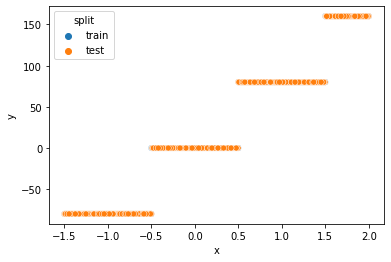

In [291]:
sns.scatterplot(x='x', y='y', hue='split', data=df)

W tym przypadku zastosuję prostszą architekturę z jedną warstwą ukrytą i 5 neuronami. Ważne tutaj są wysokie wartości dla wag przy `input_layer`

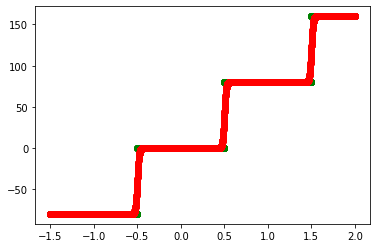

In [293]:
mlp2 = MLP(
            input_size=1,
            neurons_in_layer=[5],
            weights=np.concatenate( (             
                np.array([0, 50, -150, 50, -50, 50]),
                np.array([0,100,100,100,100,0]),                
                np.array([-180,80, 80,80,0,0])
)))

train_df = df.query('split == "train"')
x = train_df['x'].values
x = np.expand_dims(x, 1)
y_pred = mlp2.forward(x)
y_pred = np.squeeze(y_pred)
y_pred.shape

plt.scatter(train_df['x'], train_df['y'], color='green')
plt.scatter(train_df['x'], y_pred, color='red')

In [238]:
metrics.mean_absolute_error(train_df['y'], y_pred)

0.950452563159524